## 3.3 前処理とスケール変換

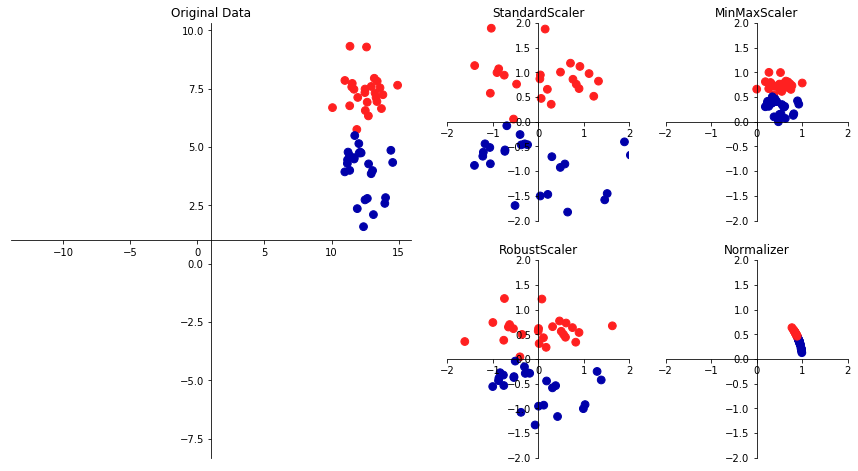

In [3]:
import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_scaling()
plt.show()

### 様々な前処理

- StanderdScaler
    - 特徴: 個々の特徴量を平均0分散が1になるように変換する
    - 問題点: Min, Maxが一定の範囲に入ることを保証するわけではない
- RobustScaler
    - 特徴: 分散の代わりに中央値と四分位数を用いる -> 外れ値を無視
- MinMaxScaler
    - 特徴: データが全て0~1の範囲に定まるように変換する
- Normalizer
    - 特徴: 特徴量ベクトルがユークリッド長1になるようにする -> ベクトルの長さではなく角度が問題になる場合に用いられる

## データ変換の適用

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [6]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [9]:
X_train_scaled = scaler.transform(X_train)
##　ここから
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [  6.98100000e+00   1.03800000e+01   4.37900000e+01   1.43500000e+02
   5.26300000e-02   2.65000000e-02   0.00000000e+00   0.00000000e+00
   1.16700000e-01   5.02500000e-02   1.14400000e-01   3.60200000e-01
   7.57000000e-01   6.80200000e+00   2.66700000e-03   3.74600000e-03
   0.00000000e+00   0.00000000e+00   7.88200000e-03   9.50200000e-04
   7.93000000e+00   1.24900000e+01   5.04100000e+01   1.85200000e+02
   8.40900000e-02   4.32700000e-02   0.00000000e+00   0.00000000e+00
   1.56500000e-01   5.50400000e-02]
per-feature maximum before scaling:
 [  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26400000e-01   1.91300000e-01
   2.90600000e-01   9.57500000e-02   2.87300000e+00   3.64700000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+0

In [10]:
X_test_scaled = scaler.transform(X_test)

print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.07648256 -0.02318339  0.07117684  0.03295864  0.08919383 -0.02232675
  0.          0.         -0.06152961 -0.00637363 -0.00105126  0.00079104
  0.00067851  0.00079567 -0.0335172  -0.01134793  0.          0.          0.0233157
 -0.00191763  0.03635717 -0.01268556  0.03107724  0.01349292 -0.09327846
 -0.01574803  0.          0.          0.00023759  0.01252788]
per-feature maximum after scaling:
[ 0.8173127   0.76435986  0.84589869  0.68610817  0.83118173  0.89338351
  1.00093809  1.05175118  1.07705578  1.03714286  0.50554629  1.37665815
  0.44117231  0.4224857   0.72596002  0.77972564  0.38762626  0.66054177
  0.75389768  0.75839224  0.80896478  0.88852901  0.75696001  0.66869839
  0.9075879   0.81108275  0.61717252  0.88487973  1.20527441  0.77371114]


## 訓練データとテストデータを同じように変換する

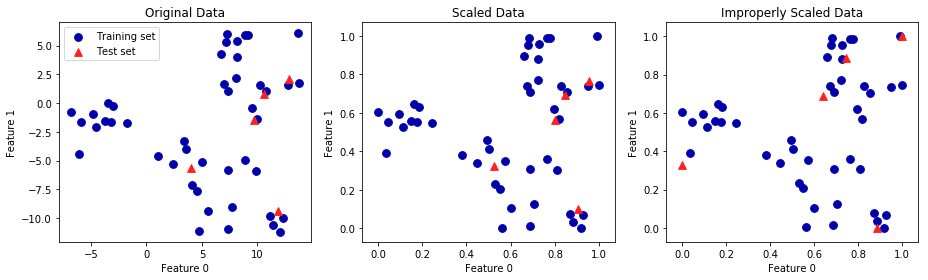

In [18]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# テストセットを訓練セットとは別にスケール変換
# 実際にはしてはいけない
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

plt.show()

# Improperly Scaled Dataの図は他の図と明らかに異なっている=> 駄目です

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 同じだがfit_transformの方が効率的に計算できる場合がある
X_scaled = scaler.fit(X_train).transform(X_train)
X_scaled_d = scaler.fit_transform(X_train)

### 教師あり学習における前処理の効果

In [19]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


In [20]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96
